In [ ]:
import tensorflow as tf
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
train_images = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
val_images = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.68088233, 0.56078434, 0.57781863],
        [0.66881126, 0.5673407 , 0.57941175],
        [0.625674  , 0.53547794, 0.55900735],
        ...,
        [0.74332106, 0.652451  , 0.6406863 ],
        [0.7529412 , 0.64362746, 0.65392154],
        [0.76262254, 0.64889705, 0.65857846]],

       [[0.6671569 , 0.5651961 , 0.5740196 ],
        [0.6661765 , 0.5715686 , 0.57303923],
        [0.61764705, 0.527451  , 0.5509804 ],
        ...,
        [0.75980395, 0.6608456 , 0.6466299 ],
        [0.7608456 , 0.6579044 , 0.6539828 ],
        [0.76911765, 0.64932597, 0.6632353 ]],

       [[0.67990196, 0.5625613 , 0.5704044 ],
        [0.66182595, 0.56035537, 0.5652574 ],
        [0.62849265, 0.5464461 , 0.56482846],
        ...,
        [0.7490809 , 0.6539828 , 0.65447307],
        [0.7533701 , 0.6509804 , 0.654902  ],
        [0.7511642 , 0.65294117, 0.654902  ]],

       ...,

       [[0.39552698, 0.45343137, 0.5331495 ],
        [0.38474265, 0.45055148, 0.52156866],
        [0.39166668, 0

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [ ]:
train_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.04803, 0.1323 , 0.452  , 0.712  ], dtype=float16))

In [ ]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(10620, 10620, 1720, 1720, 1760, 1760)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(4210)
train = train.batch(8)
train = train.prefetch(4)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(920)
test = test.batch(8)
test = test.prefetch(4)

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(880)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()

(array([[[[9.98529434e-01, 1.00000000e+00, 9.97058809e-01],
          [9.98529434e-01, 1.00000000e+00, 9.97058809e-01],
          [9.98529434e-01, 1.00000000e+00, 9.97058809e-01],
          ...,
          [2.03431368e-01, 2.16973037e-01, 2.33026966e-01],
          [2.26654410e-01, 2.60477930e-01, 2.49203429e-01],
          [2.58272052e-01, 2.97487736e-01, 2.63664216e-01]],
 
         [[9.96078432e-01, 1.00000000e+00, 9.93137240e-01],
          [9.96078432e-01, 1.00000000e+00, 9.93137240e-01],
          [9.96078432e-01, 1.00000000e+00, 9.93137240e-01],
          ...,
          [2.29473040e-01, 2.45159313e-01, 2.55943626e-01],
          [2.22549021e-01, 2.45098040e-01, 2.30882347e-01],
          [2.70098031e-01, 2.97549009e-01, 2.68811285e-01]],
 
         [[9.88235295e-01, 9.92156863e-01, 1.00000000e+00],
          [9.88235295e-01, 9.92156863e-01, 1.00000000e+00],
          [9.88235295e-01, 9.92156863e-01, 1.00000000e+00],
          ...,
          [2.04901963e-01, 2.20588237e-01, 2.3235

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
import cv2

In [ ]:
res = data_samples.next()

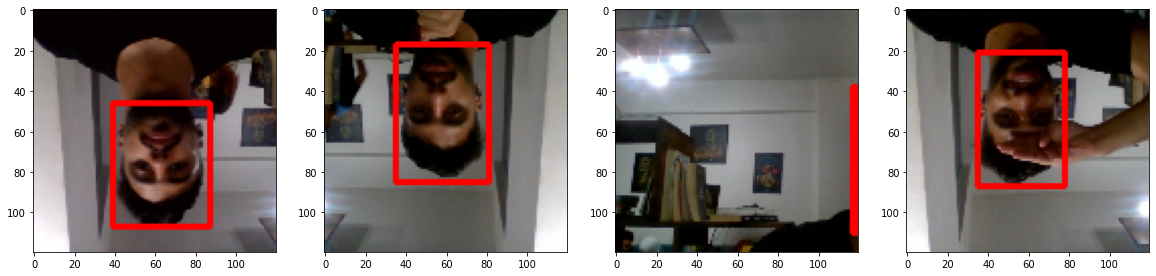

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
X.shape

(8, 120, 120, 3)

In [ ]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8), array([[0.4153 , 0.315  , 0.861  , 0.86   ],
        [0.2405 , 0.3176 , 0.6113 , 0.84   ],
        [0.224  , 0.2512 , 0.671  , 0.7812 ],
        [0.1298 , 0.2404 , 0.661  , 0.899  ],
        [0.252  , 0.293  , 0.64   , 0.796  ],
        [0.377  , 0.2698 , 0.7266 , 0.819  ],
        [0.546  , 0.1527 , 0.9487 , 0.6953 ],
        [0.     , 0.12274, 0.3838 , 0.6235 ]], dtype=float16))

In [ ]:
classes, coords = facetracker.predict(X)

In [ ]:
classes, coords

(array([[0.6435684 ],
        [0.6804484 ],
        [0.64148724],
        [0.683518  ],
        [0.7461351 ],
        [0.6847868 ],
        [0.6847558 ],
        [0.62317854]], dtype=float32),
 array([[0.5180166 , 0.41850424, 0.5244419 , 0.34944254],
        [0.55717015, 0.47332424, 0.5419867 , 0.24423109],
        [0.5935832 , 0.47824463, 0.5245383 , 0.30245692],
        [0.5011017 , 0.43336526, 0.591196  , 0.2780216 ],
        [0.543883  , 0.45161667, 0.53203386, 0.27601066],
        [0.49084857, 0.4452399 , 0.55110127, 0.2624795 ],
        [0.61843246, 0.39932975, 0.4385246 , 0.3623215 ],
        [0.51031744, 0.45662904, 0.5644764 , 0.35251644]], dtype=float32))

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [ ]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.3963337>

In [ ]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.39666358>

In [ ]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.3963337>

In [ ]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
1328/1328 [==============================] - 1822s 1s/step - total_loss: 0.3333 - class_loss: 0.0898 - regress_loss: 0.2884 - val_total_loss: 0.4555 - val_class_loss: 0.0679 - val_regress_loss: 0.4215
Epoch 2/10
1328/1328 [==============================] - 127s 83ms/step - total_loss: 0.1202 - class_loss: 0.0290 - regress_loss: 0.1057 - val_total_loss: 0.0570 - val_class_loss: 0.0193 - val_regress_loss: 0.0473
Epoch 3/10
1328/1328 [==============================] - 127s 83ms/step - total_loss: 0.0804 - class_loss: 0.0192 - regress_loss: 0.0708 - val_total_loss: 2.5601 - val_class_loss: 1.4846 - val_regress_loss: 1.8178
Epoch 4/10
1328/1328 [==============================] - 126s 83ms/step - total_loss: 0.0467 - class_loss: 0.0098 - regress_loss: 0.0418 - val_total_loss: 0.9175 - val_class_loss: 0.6835 - val_regress_loss: 0.5757
Epoch 5/10
1328/1328 [==============================] - 127s 84ms/step - total_loss: 0.0298 - class_loss: 0.0041 - regress_loss: 0.0278 - val_total_l

In [ ]:
hist.history

{'total_loss': [0.05443672090768814,
  0.030926207080483437,
  0.01863865740597248,
  0.027319060638546944,
  0.007726727984845638,
  0.007529580965638161,
  0.002331534866243601,
  0.0014396810438483953,
  0.00308776437304914,
  0.003977971151471138],
 'class_loss': [0.011664207093417645,
  0.016004938632249832,
  0.00011700046161422506,
  0.00010864740761462599,
  1.8448057744535618e-05,
  0.00019288821204099804,
  0.00021390290930867195,
  5.215408691583434e-07,
  0.00014398297935258597,
  1.7255730199394748e-05],
 'regress_loss': [0.04860461875796318,
  0.02292373776435852,
  0.018580157309770584,
  0.027264736592769623,
  0.007717504166066647,
  0.00743313692510128,
  0.002224583411589265,
  0.001439420273527503,
  0.00301577290520072,
  0.0039693433791399],
 'val_total_loss': [0.4554513096809387,
  0.05697258189320564,
  2.5600578784942627,
  0.9175032377243042,
  0.03652827441692352,
  0.030796857550740242,
  0.01292493287473917,
  1.37534499168396,
  0.01444901805371046,
  1.31

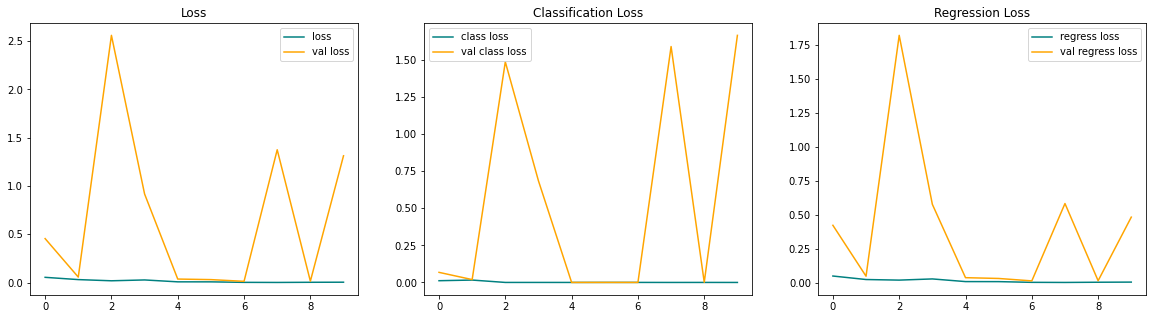

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

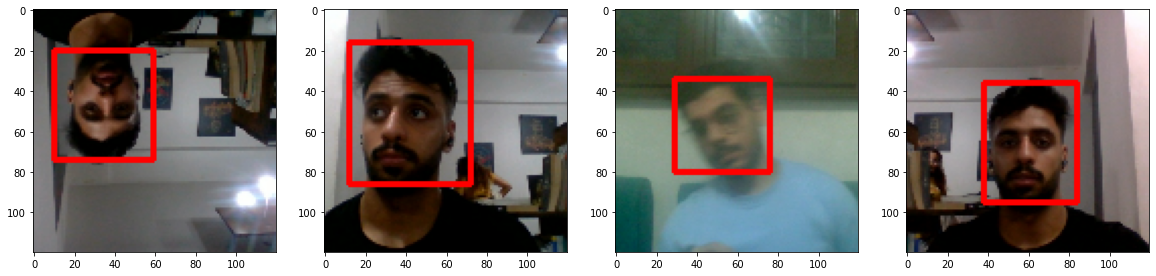

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.7:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [ ]:
model.save_weights('/content/drive/MyDrive/ML_PROJECTSS/',save_format=None, options=None)

In [ ]:
!cd /content/drive/MyDrive

In [ ]:
facetracker.save('facetracker.h5')

In [ ]:
from tensorflow.keras.models import load_model
facetracker = load_model('facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()